In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA = '/content/drive/MyDrive/Datasets/amazon_reviews_processed_2.csv'
df = pd.read_csv(DATA)
df.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,stopwords,punctuation,hashtags,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity,Good_reviews
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,good quality dog food,bought several vitality canned dog food produc...,21,3,0,0,1,23,164,6.2,0.42,0.40,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,not as advertised,product arrived labeled jumbo salted peanutsth...,12,7,0,0,0,18,136,6.6,0.22,0.76,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,delight says it all,confection around centuries light pillowy citr...,42,18,0,0,2,40,285,6.1,0.19,0.55,1
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,cough medicine,looking secret ingredient robitussin believe f...,15,5,0,0,4,18,128,6.2,0.15,0.65,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,great taffy,great taffy great price wide assortment yummy ...,12,5,0,0,0,13,83,5.5,0.46,0.60,1


In [4]:
print(len(df))
print(df.Id.nunique())
print(df.UserId.nunique())

568411
568411
256047


In [5]:
n = df.groupby('UserId').agg({'Id' : len}).rename(columns={'Id': 'Reviews'}).sort_values(by='Reviews', ascending=False)
n

,Reviews
UserId,
A3OXHLG6DIBRW8,448
A1YUL9PCJR3JTY,421
AY12DBB0U420B,389
A281NPSIMI1C2R,365
A1Z54EM24Y40LL,256
...,...
A2HROR28DMJV2W,1
A2HRR8CO2Y20G8,1
A2HRSML93IK9TR,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568411 entries, 0 to 568410
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      568411 non-null  int64  
 1   ProductId               568411 non-null  object 
 2   UserId                  568411 non-null  object 
 3   HelpfulnessNumerator    568411 non-null  int64  
 4   HelpfulnessDenominator  568411 non-null  int64  
 5   Score                   568411 non-null  int64  
 6   Time                    568411 non-null  object 
 7   Summary                 567882 non-null  object 
 8   Text                    568411 non-null  object 
 9   stopwords               568411 non-null  int64  
 10  punctuation             568411 non-null  int64  
 11  hashtags                568411 non-null  int64  
 12  numerics                568411 non-null  int64  
 13  upper                   568411 non-null  int64  
 14  word_count          

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


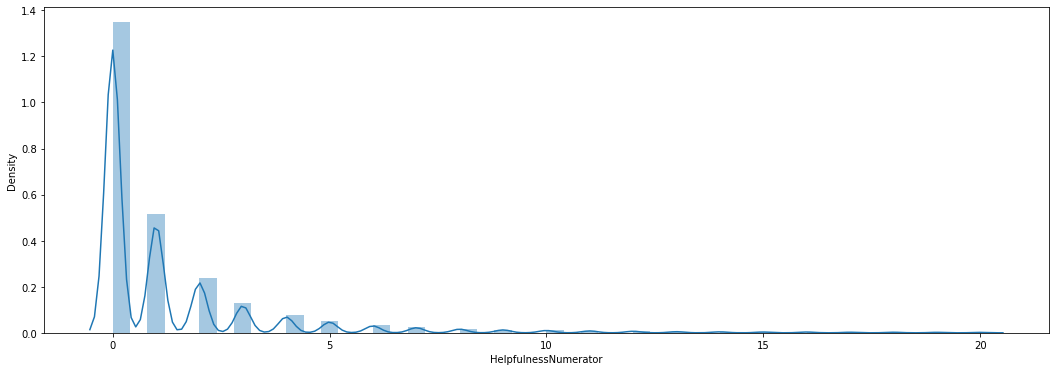

In [7]:
plt.figure(figsize=(18, 6))
sns.distplot(df.HelpfulnessNumerator[df.HelpfulnessNumerator <= 20])

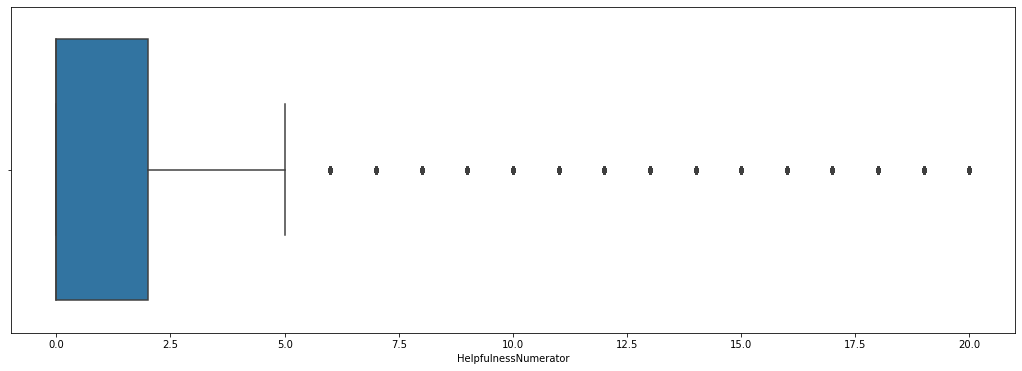

In [8]:
plt.figure(figsize=(18, 6))
sns.boxplot(x=df.HelpfulnessNumerator[df.HelpfulnessNumerator <= 20])

In [9]:
df.Text = df.Text.astype(str)

In [10]:
y = df.HelpfulnessNumerator[df.HelpfulnessNumerator <= 20]
X = df.Text[df.HelpfulnessNumerator <= 20]

In [11]:
print(X.shape)
print(y.shape)

(563246,)
(563246,)


## Text Preprocessing 
* Tokenizing

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
X_count = count_vec.fit_transform(X)

In [13]:
X_count.shape 

(563246, 211503)

In [14]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_count, y, train_size=0.7)

print(X_train.shape)
print(X_test.shape)

(394272, 211503)
(168974, 211503)


In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False)
X_train_tf = tf_transformer.fit_transform(X_train)
X_test_tf = tf_transformer.fit_transform(X_test)

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=False)
X_train_tf= sc.fit_transform(X_train_tf)
X_test_tf= sc.transform(X_test_tf)

In [21]:
# Base Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

clf = MultinomialNB()

clf.fit(X_train_tf, y_train)

train_preds = clf.predict(X_train_tf)
test_preds = clf.predict(X_test_tf)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(train_acc)
print(test_acc)

0.6209393515136759
0.4327056233503379


In [ ]:
# Base Model
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()

clf.fit(X_train_tf, y_train)

train_preds = clf.predict(X_train_tf)
test_preds = clf.predict(X_test_tf)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(train_acc)
print(test_acc)

### Creating helpfulness_level feature

In [ ]:
df = df[df.HelpfulnessNumerator <= 20]

In [53]:
df['helpfulness_level'] = pd.cut(df.HelpfulnessNumerator, bins=[-1, 0, 5, 10, 15, 20], labels=[0, 1, 2, 3, 4])

In [54]:
df.helpfulness_level.value_counts()

0    303813
1    227597
2     22211
3      6667
4      2958
Name: helpfulness_level, dtype: int64

In [62]:
y = df.helpfulness_level
X = df.Text

In [63]:
count_vec = CountVectorizer()
X_count = count_vec.fit_transform(X)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_count, y, train_size=0.7)

print(X_train.shape)
print(X_test.shape)

(394272, 211503)
(168974, 211503)


In [65]:
tf_transformer = TfidfTransformer(use_idf=False)
X_train_tf = tf_transformer.fit_transform(X_train)
X_test_tf = tf_transformer.fit_transform(X_test)

In [66]:
sc = StandardScaler(with_mean=False)
X_train_tf= sc.fit_transform(X_train_tf)
X_test_tf= sc.transform(X_test_tf)

In [67]:
clf = MultinomialNB()

clf.fit(X_train_tf, y_train)

train_preds = clf.predict(X_train_tf)
test_preds = clf.predict(X_test_tf)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(train_acc)
print(test_acc)

0.7061470254037822
0.5637967971403884


In [68]:
clf = SGDClassifier()

clf.fit(X_train_tf, y_train)

train_preds = clf.predict(X_train_tf)
test_preds = clf.predict(X_test_tf)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(train_acc)
print(test_acc)

0.8041326799772746
0.6160533573212447


In [74]:
confusion_matrix(y_test, test_preds)

array([[66171, 21630,  2102,   958,   371],
       [29835, 34979,  2078,   930,   349],
       [ 2291,  2296,  1938,   132,    49],
       [  541,   602,   101,   660,    22],
       [  228,   284,    56,    22,   349]])